# Kerasによる畳み込みニューラルネットワーク
アメリカNISTによる手書きの数字集（MNIST)

### データセットの標本情報

In [1]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [2]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

In [3]:
train_images.shape

(60000, 28, 28, 1)

In [4]:
test_images =test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

### ラベルのone-hotエンコーディング処理

In [5]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
train_labels.shape

(60000, 10)

# モデル構築

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

### 畳み込みニューラルネットワーク

In [21]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                692288    
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 693,578
Trainable params: 693,578
Non-trainable params: 0
________________________________________________

In [23]:
model.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

### 学習

In [24]:
history = model.fit(train_images,train_labels,
                    epochs=10,
                    batch_size=128,
                   validation_data=(test_images,test_labels))

Epoch 1/10
469/469 [==============================] - 20s 42ms/step - loss: 0.9300 - accuracy: 0.7746 - val_loss: 0.3765 - val_accuracy: 0.8964
Epoch 2/10
469/469 [==============================] - 21s 45ms/step - loss: 0.3489 - accuracy: 0.8999 - val_loss: 0.2985 - val_accuracy: 0.9141
Epoch 3/10
469/469 [==============================] - 21s 44ms/step - loss: 0.2974 - accuracy: 0.9133 - val_loss: 0.2689 - val_accuracy: 0.9232
Epoch 4/10
469/469 [==============================] - 21s 45ms/step - loss: 0.2673 - accuracy: 0.9220 - val_loss: 0.2421 - val_accuracy: 0.9298
Epoch 5/10
469/469 [==============================] - 22s 47ms/step - loss: 0.2442 - accuracy: 0.9290 - val_loss: 0.2253 - val_accuracy: 0.9339
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.2252 - accuracy: 0.9341 - val_loss: 0.2097 - val_accuracy: 0.9393
Epoch 7/10
469/469 [==============================] - 21s 45ms/step - loss: 0.2104 - accuracy: 0.9386 - val_loss: 0.1976 - val_accuracy:

### 正解率

In [25]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print (test_loss,test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1666 - accuracy: 0.9520
0.16661560535430908 0.9520000219345093


In [26]:
loss = history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1,len(loss)+1)

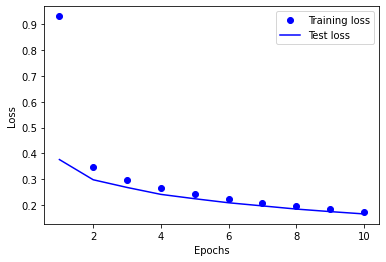

In [27]:
import matplotlib.pyplot as plt
plt.plot(epochs,loss, 'bo', label='Training loss')
plt.plot(epochs,val_loss, 'b', label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

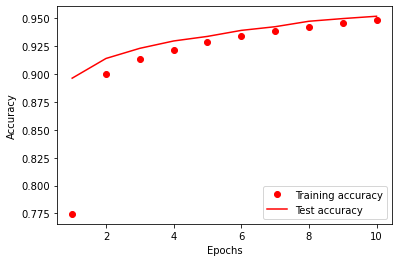

In [29]:
plt.plot(epochs,acc, 'ro', label='Training accuracy')
plt.plot(epochs,val_acc, 'r', label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()